In [2]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

chipotle_df = pd.read_csv(url, sep="\t")
chipotle_df.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [9]:
chipotle_df.info()
chipotle_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [3]:
list(chipotle_df.columns)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

In [4]:

# chipotle_df.sort_values("quantity")
item_orders = chipotle_df.groupby("item_name")['quantity'].sum()
max_order = item_orders.max()
most_order_item = item_orders.idxmax()
print(most_order_item)
print(max_order)

Chicken Bowl
761


In [5]:
chipotle_df['item_price']=chipotle_df['item_price'].astype(str).str.strip().str.replace('$','').astype(float)
revene = (chipotle_df['quantity']*chipotle_df['item_price']).sum()
revene
# chipotle_df['item_price']

np.float64(39237.02)

In [7]:
total_order = chipotle_df["order_id"].nunique()
total_order

1834

In [6]:
count = 0
for price in chipotle_df['item_price']:
    if price > 10:
        count += 1
count

1130

In [8]:
item_names = chipotle_df["item_name"].unique()
for item in item_names:
    print(item)


Chips and Fresh Tomato Salsa
Izze
Nantucket Nectar
Chips and Tomatillo-Green Chili Salsa
Chicken Bowl
Side of Chips
Steak Burrito
Steak Soft Tacos
Chips and Guacamole
Chicken Crispy Tacos
Chicken Soft Tacos
Chicken Burrito
Canned Soda
Barbacoa Burrito
Carnitas Burrito
Carnitas Bowl
Bottled Water
Chips and Tomatillo Green Chili Salsa
Barbacoa Bowl
Chips
Chicken Salad Bowl
Steak Bowl
Barbacoa Soft Tacos
Veggie Burrito
Veggie Bowl
Steak Crispy Tacos
Chips and Tomatillo Red Chili Salsa
Barbacoa Crispy Tacos
Veggie Salad Bowl
Chips and Roasted Chili-Corn Salsa
Chips and Roasted Chili Corn Salsa
Carnitas Soft Tacos
Chicken Salad
Canned Soft Drink
Steak Salad Bowl
6 Pack Soft Drink
Chips and Tomatillo-Red Chili Salsa
Bowl
Burrito
Crispy Tacos
Carnitas Crispy Tacos
Steak Salad
Chips and Mild Fresh Tomato Salsa
Veggie Soft Tacos
Carnitas Salad Bowl
Barbacoa Salad Bowl
Salad
Veggie Crispy Tacos
Veggie Salad
Carnitas Salad


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Chicken Bowl'),
  Text(1, 0, 'Chicken Burrito'),
  Text(2, 0, 'Chips and Guacamole'),
  Text(3, 0, 'Steak Burrito'),
  Text(4, 0, 'Canned Soft Drink')])

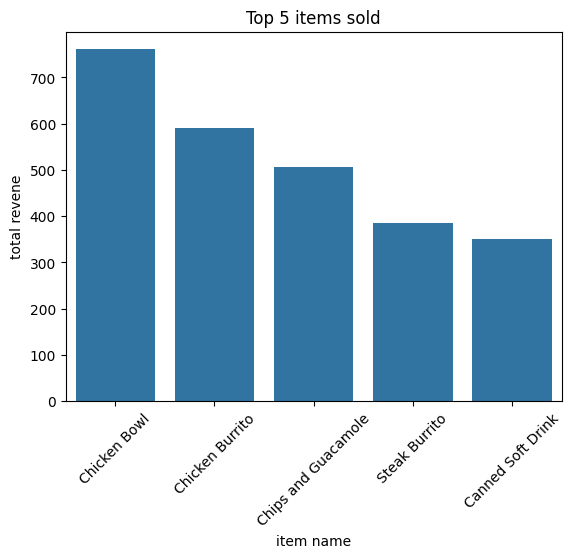

In [11]:
top5_sold = item_orders.sort_values(ascending=False).head()
seaborn.barplot(data=top5_sold)
plt.xlabel('item name')
plt.ylabel('total revene')
plt.title('Top 5 items sold')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Top 10 items ordered')

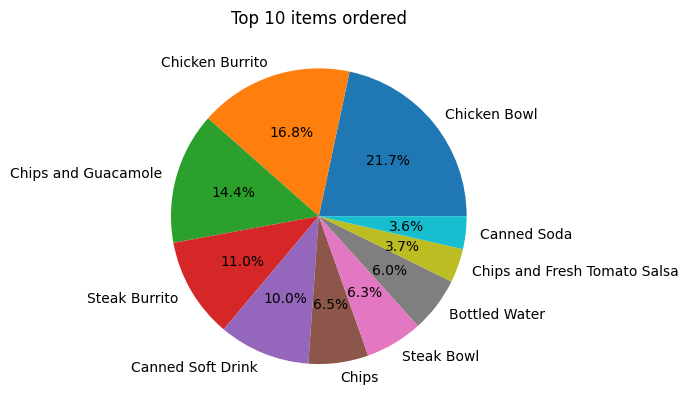

In [10]:
top10_sold = item_orders.sort_values(ascending=False).head(10)
plt.pie(top10_sold, labels=top10_sold.index, autopct="%1.1f%%")
plt.title('Top 10 items ordered')



Text(0.5, 1.0, 'Revene from top 10 orders')

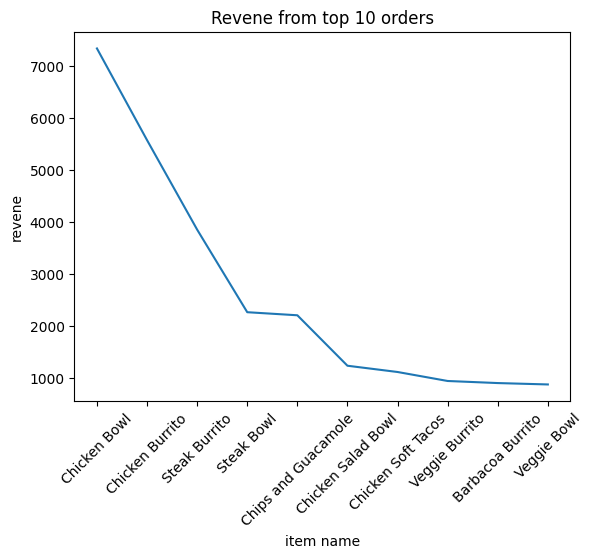

In [15]:
top10_revene = chipotle_df.groupby("item_name")['item_price'].sum()
top10_price = top10_revene.sort_values(ascending = False).head(10)
seaborn.lineplot(data=top10_price)
plt.xlabel('item name')
plt.ylabel('revene')
plt.xticks(rotation=45)
plt.title('Revene from top 10 orders')